In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df = pd.read_csv('vgsales.csv')

Disini adalah pendeklarasian library dan juga pengambilan DataFrame untuk dataset yang saya pakai

In [2]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Kemudian saya mencari Null references di setiap data yang ada, disini terdapat di Year dan juga Publisher. Untuk keduanya aslinya tidak penting, karena bisa jadi saja tidak ada dokumentasi yang benar untuk kedua hal tersebut dalam suatu game (lost media)

In [3]:
df = df.dropna(subset=['Year'])
df = df.dropna(subset=['Publisher'])

Disini saya menggunakan pandas untuk membersihkan data yang memiliki null

In [4]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [5]:
duplicate = df.duplicated().sum()
print(duplicate)

0


Sekarang adalah melihat duplicated data, tetapi disini sudah termunculkan bahwa tidak ada duplikat

<Axes: ylabel='Global_Sales'>

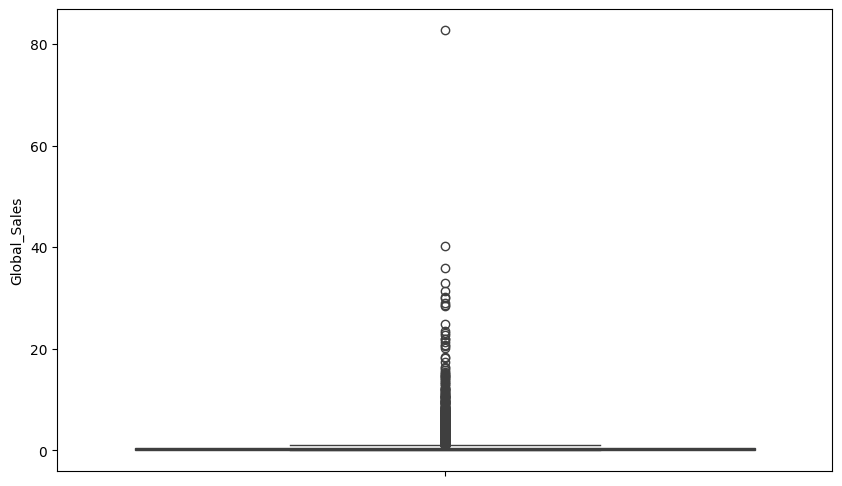

In [6]:
fix, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df['Global_Sales'])

Untuk Outlier memang saya tahu kenapa terjadi disini. Kebanyakan game yang diambil berasal dari kisaran waktu 2000-2010, era dimana game itu belum terlalu populer. Ini juga membuat data game awal (1980-2000) terlihat memiliki sales yang rendah dibandingkan dengan Maximum di data, yang akhirnya median dan mean dari dataset jauh dengan maximum dan membuat outlier seperti diatas.

In [7]:
# Normalization
scaler = sk.preprocessing.MinMaxScaler()
df_numerical = df.select_dtypes(include=['float64', 'int64'])
df_numerical_normalized = df.copy()
df_numerical_normalized[df_numerical.columns] = scaler.fit_transform(df_numerical)
df_numerical_normalized.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.000000,Wii Sports,Wii,0.650,Sports,Nintendo,1.000000,1.000000,0.368885,0.800378,1.000000
1,0.000060,Super Mario Bros.,NES,0.125,Platform,Nintendo,0.700892,0.123363,0.666341,0.072848,0.486281
2,0.000120,Mario Kart Wii,Wii,0.700,Racing,Nintendo,0.382020,0.443832,0.370841,0.313150,0.432854
3,0.000181,Wii Sports Resort,Wii,0.725,Sports,Nintendo,0.379610,0.379394,0.320939,0.280038,0.398767
4,0.000241,Pokemon Red/Pokemon Blue,GB,0.400,Role-Playing,Nintendo,0.271632,0.306340,1.000000,0.094607,0.379064


Selanjutnya adalah pembuatan Normalisation. Disini mengambil semua data dari data type float dan integer saja, dan membuat dataframe baru juga supaya dataframe utama tidak ternodai. Normalisasi melakukan perubahan dalam setiap kolom numerik, mengubahnya diantara 0 dan 1 dimana 0 adalah data yang paling rendah di keseluruhan dan 1 adalah data yang paling tinggi.

In [8]:
# Standarisasi
scaler = sk.preprocessing.StandardScaler()
df_numerical_standardized = df.copy()
df_numerical_standardized[df_numerical.columns] = scaler.fit_transform(df_numerical)
df_numerical_standardized.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,-1.729615,Wii Sports,Wii,-0.069538,Sports,Nintendo,50.126469,56.691515,11.835597,44.253501,52.446423
1,-1.729406,Super Mario Bros.,NES,-3.670217,Platform,Nintendo,35.036615,6.739357,21.583251,3.796218,25.329663
2,-1.729197,Mario Kart Wii,Wii,0.273384,Racing,Nintendo,18.949687,25.000169,11.899727,17.159222,22.509520
3,-1.728989,Wii Sports Resort,Wii,0.444845,Sports,Nintendo,18.828093,21.328372,10.264430,15.317863,20.710243
4,-1.728780,Pokemon Red/Pokemon Blue,GB,-1.784147,Role-Playing,Nintendo,13.380668,17.165692,32.517296,5.006254,19.670236


Kemudian adalah Standarization, yaitu membuat semua data menjadi mengikuti rata-rata. Saya kurang tau ini menjadi seperti apa, karena kurang jelas penjelasannya di modul pembelajaran.

In [14]:
# Ordinal Encoding

encoder = sk.preprocessing.OrdinalEncoder()
df_ordinal = df.copy()
df_ordinal['Platform_Code'] = encoder.fit_transform(df[['Platform']])
df_ordinal.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Code
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,26.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,11.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,26.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,26.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5.0
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,5.0
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,4.0
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,26.0
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,26.0
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,11.0


Sekarang adalah Encoding menggunakan metode Ordinal. Alasan kenapa memakai Ordinal adalah pilihan kolom yang saya pilih untuk di encoding, yaitu Platform. Platform sendiri memiliki banyak valuenya, tidak hanya dua saja. Jadi Ordinal adalah pilihan yang cocok untuk metode encoding.

Ordinal Encoding mengambil suatu kolom, kemudian memberikan value dalam kolom itu sebuah kode, misalnya Mamalia adalah 1, Pisces adalah 2, Amphibia adalah 3, dan seterusnya. Diatas saya membuat sebuah kolom baru dengan menggunakan platform dan memberikan setiap platform sebuah platform code.

In [12]:
# Feature Engineering

bins = [0, 1, 5, 10, 30, 50, 100, 200]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Super High', 'Ultra High']
df_feature = df.copy()
df_feature['Sales_Category'] = pd.cut(df['Global_Sales'], bins=bins, labels=labels)
df_feature.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Category
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Super High
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Very High
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Very High
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Very High
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Very High
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Very High
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Very High
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,High
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,High
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,High


Setelah itu ada Feature Engineering, yakni membuat sebuah kategorikal baru untuk suatu kolom numerikal. Disini saya membuat sebuah kolom untuk mengkategorikan dataset kedalam sebuah kategori berdasarkan Global_Sales mereka.

In [11]:
df_split = df.copy()
x = df_split.iloc[:,:-1]
y = df_split.iloc[:,-1]

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (13032, 10)
x_test shape: (3259, 10)
y_train shape: (13032,)
y_test shape: (3259,)


Terakhir adalah memisahkan dataset ke 4 bagian, yaitu untuk training dan juga untuk testing. Lagi-lagi saya kurang tau kenapa mesti ada X dan Y sets, tetapi diatas adalah set tersebut untuk dilakukan training model dengan dataset.